In [2]:
import requests
#import urllib3
#urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)
 
activities_url =  "https://www.strava.com/api/v3/athlete/activities"

header = {'Authorization': 'Bearer' + '271157148e41c80947e2b304bb5d6af5c40eccc2'}
param = {'per_page': 200, 'page':1}
my_dataset = requests.get(activities_url, headers=header,params=param).json()

print(my_dataset)

{'message': 'Authorization Error', 'errors': [{'resource': 'Athlete', 'field': 'access_token', 'code': 'invalid'}]}


In [3]:
#import pymongo
#from pymongo import MongoClient
#mongo_client = MongoClient()
#host_info = mongo_client['HOST']

#print ("version:", pymongo.version)
#print ("host:", host_info) #default port that mongo runs on is 27017


In [49]:
import requests
import urllib3
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

auth_url = "https://www.strava.com/oauth/token"
activites_url = "https://www.strava.com/api/v3/athlete/activities"

payload = {
    'client_id': "50931",
    'client_secret': '94fffa404b698da15623cd616988c750c8071966',
    'refresh_token': '0210f5cc4eadd2ec34c53f6bbf58dc5e892b3cae', #this refresh token doesn't expire, which is why we can use it to continue accessing an access token.
    'grant_type': "refresh_token",
    'f': 'json'
}

print("Requesting Token...\n")
res = requests.post(auth_url, data=payload, verify=False)
access_token = res.json()['access_token']
print("Access Token = {}\n".format(access_token))

header = {'Authorization': 'Bearer ' + access_token}
param = {'per_page': 200, 'page': 1}
my_dataset = requests.get(activites_url, headers=header, params=param).json()

print(my_dataset[0]["name"])
print(my_dataset[0]["map"]["id"])



Requesting Token...

Access Token = b504bd3d3f5c8c13909c766754f672b975a48dfc

Hello SIOT!
a6391161757


In [50]:
import pandas as pd

strava_data = pd.read_csv("Strava_readings.csv")
strava_data.head()

,Activity ID,Name,Kudos,Type,Distance,Pace,Elapsed time,Date
0,6234966079,API test 2,0,Run,33.1,13.23,9,2021-11-09 18:31:36
1,6251689350,Walk to shops,0,Run,1226.7,6.96,1060,2021-11-13 11:53:53
2,6258146055,Afternoon Activity,1,Workout,5627.9,5.36,4866,2021-11-14 13:40:52
3,6263496493,Night Activity,0,Workout,708.3,4.37,584,2021-11-15 23:28:05
4,6265302154,Lunch Run,0,Run,4766.1,10.29,1890,2021-11-16 12:14:43


In [6]:
import datetime

light_intensity = pd.read_csv("Photosensor_readings.csv")
#code below converts time data input into a date time object - needs to know what info to extact from the string (letters denote the form of the data)
dates = [datetime.datetime.strptime(t, '%B %d, %Y at %I:%M%p') for t in light_intensity['Date']]
light_intensity['New Date'] = dates
light_intensity.head()
light_intensity['New Date'].iloc[0] #iloc used to reference a point in an array (index location)

Timestamp('2021-11-14 23:13:00')

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

#plt.style.use('_mpl-gallery')

# make data
y = light_intensity["Light Intensity"]
x = light_intensity['New Date']

#code below is checking the light intensity day by day to make sure there was no time travelling errors
day_store = x[0].day
month_store = x[0].month
last_i = 0

print(x[11], x[12])
print(light_intensity['Date'][11], light_intensity['Date'][12])
for i, date in enumerate(x):
    if i !=0 and x[i-1].timestamp()>date.timestamp():
        print('TIME TRAVELLING')
        print(i)
    if date.month!=month_store or date.day!=day_store:
        # different day
        print('Plotting Data For {}/{}/2021'.format(day_store, month_store))
        plt.figure(figsize=(25,5))
        plt.plot(x[last_i:i], y[last_i:i], linewidth=2.0)
        plt.show()
        last_i = i
        day_store = date.day
        month_store = date.month

2021-11-16 12:07:00 2021-11-16 14:03:00
November 16, 2021 at 12:07PM November 16, 2021 at 02:03PM
Plotting Data For 14/11/2021


<Figure size 2500x500 with 1 Axes>

Plotting Data For 16/11/2021


<Figure size 2500x500 with 1 Axes>

Plotting Data For 17/11/2021


<Figure size 2500x500 with 1 Axes>

Plotting Data For 18/11/2021


<Figure size 2500x500 with 1 Axes>

Plotting Data For 19/11/2021


<Figure size 2500x500 with 1 Axes>

Plotting Data For 20/11/2021


<Figure size 2500x500 with 1 Axes>

Plotting Data For 21/11/2021


<Figure size 2500x500 with 1 Axes>

Plotting Data For 22/11/2021


<Figure size 2500x500 with 1 Axes>

Plotting Data For 23/11/2021


<Figure size 2500x500 with 1 Axes>

Plotting Data For 24/11/2021


<Figure size 2500x500 with 1 Axes>

Plotting Data For 25/11/2021


<Figure size 2500x500 with 1 Axes>

Plotting Data For 26/11/2021


<Figure size 2500x500 with 1 Axes>

Plotting Data For 27/11/2021


<Figure size 2500x500 with 1 Axes>

Plotting Data For 28/11/2021


<Figure size 2500x500 with 1 Axes>

Plotting Data For 29/11/2021


<Figure size 2500x500 with 1 Axes>

Plotting Data For 30/11/2021


<Figure size 2500x500 with 1 Axes>

Plotting Data For 1/12/2021


<Figure size 2500x500 with 1 Axes>

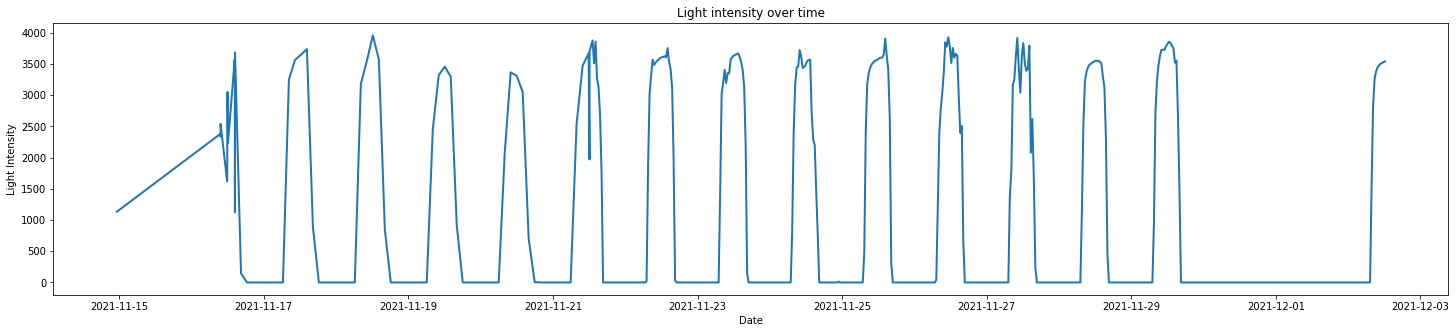

In [8]:
# make data
y = light_intensity["Light Intensity"]
x = light_intensity['New Date']

plt.figure(figsize=(25,5))
plt.plot(x, y, linewidth=2.0)
plt.xlabel("Date")
plt.ylabel("Light Intensity")
plt.title("Light intensity over time")
plt.show()

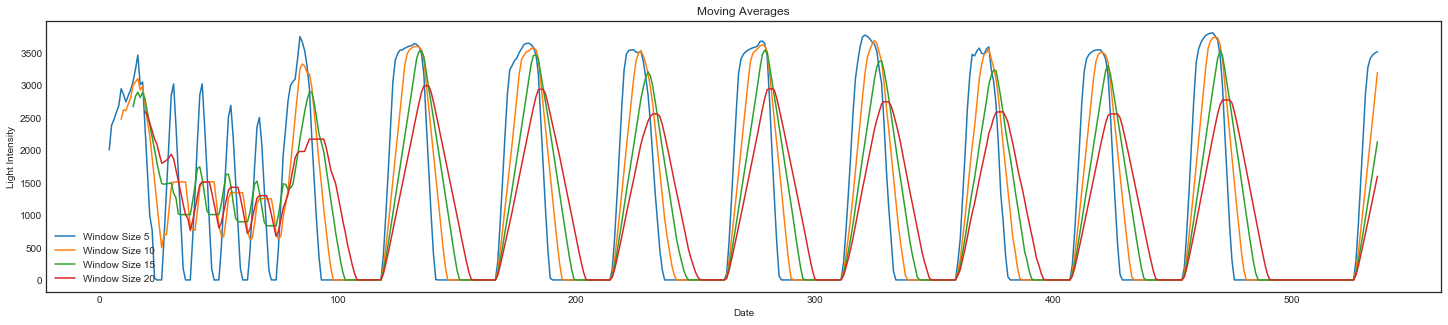

In [9]:
#series - dataframe with timeseries
#window - rolling window size 
#plot_intervals - show confidence intervals
#plot_anomalies - show anomalies 
with plt.style.context('seaborn-white'):
    plt.figure(figsize=(25,5))
    plt.title("Moving Averages")
    plt.xlabel("Date")
    plt.ylabel("Light Intensity")
    for window in [5, 10, 15, 20]:
        rolling_mean = y.rolling(window=window).mean()
        plt.plot(rolling_mean, label="Window Size {}".format(window))
    plt.legend(loc='best')  
    plt.show()
    


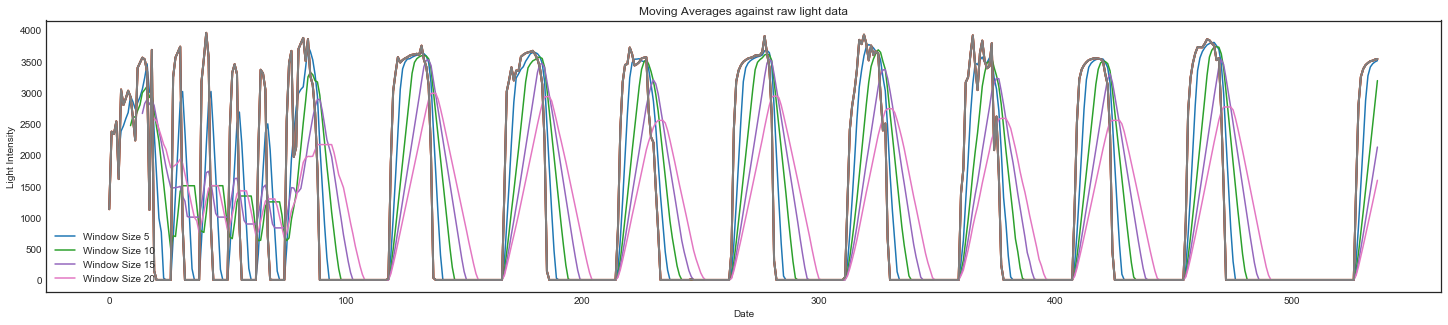

In [10]:
#plotting rolling average against raw light intensity data


with plt.style.context('seaborn-white'):
    plt.figure(figsize=(25,5))
    plt.title("Moving Averages against raw light data")
    plt.xlabel("Date")
    plt.ylabel("Light Intensity")
    for window in [5, 10, 15, 20]:
        rolling_mean = y.rolling(window=window).mean()
        plt.plot(rolling_mean, label="Window Size {}".format(window))
        plt.plot(y, linewidth=2.0)
    
    
    plt.legend(loc='best')  
    plt.show()


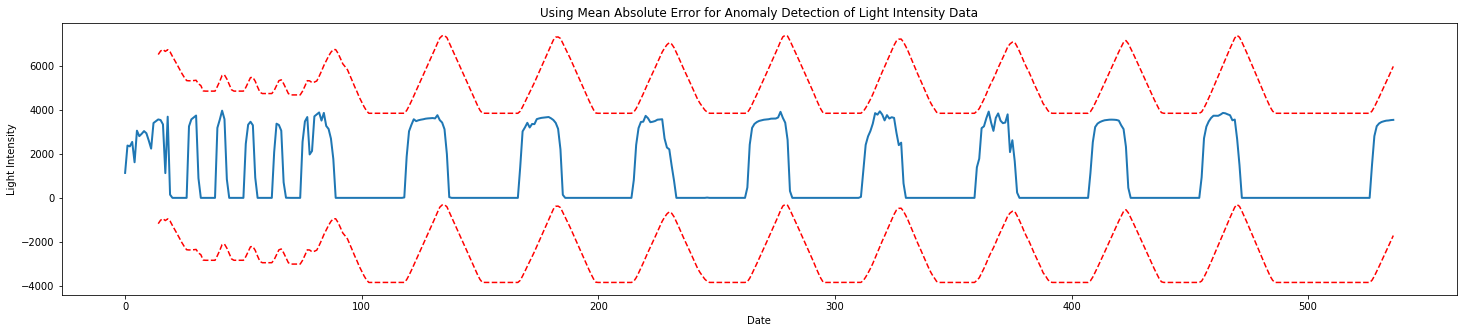

In [11]:
#using rolling average to check for anomalies - no anonalies!

# Plot confidence intervals for smoothed values
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
def plotMovingAverage(series, window, plot_intervals=False, scale=1.96, plot_anomalies=False):

    window = 15
    rolling_mean = y.rolling(window=window).mean()

    mae = mean_absolute_error(y[window:], rolling_mean[window:])
    deviation = np.std(y[window:] - rolling_mean[window:])
    lower_bond = rolling_mean - (mae + scale * deviation)
    upper_bond = rolling_mean + (mae + scale * deviation)
    plt.figure(figsize=(25,5))
    plt.title("Using Mean Absolute Error for Anomaly Detection of Light Intensity Data")
    plt.xlabel("Date")
    plt.ylabel("Light Intensity")
    plt.plot(y, linewidth=2.0)

    plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
    plt.plot(lower_bond, "r--")
    

plotMovingAverage(y, window=5) 
plt.show()

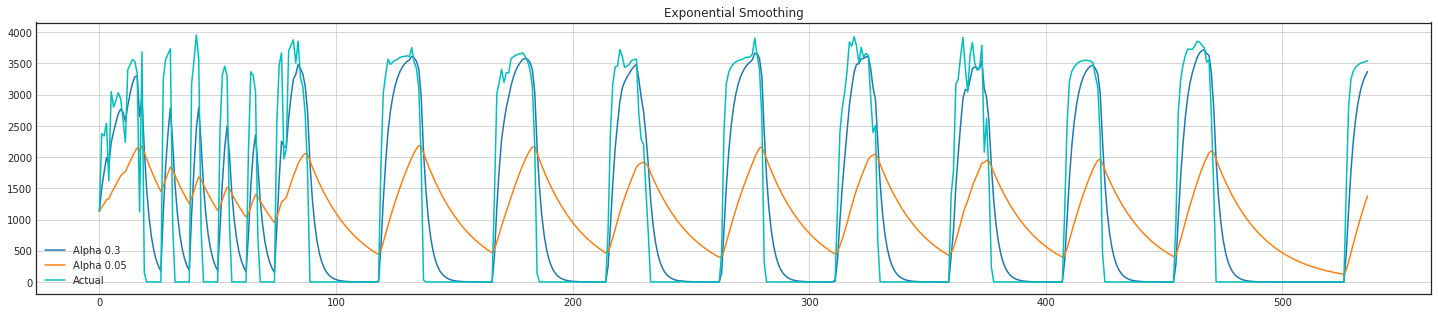

In [12]:
#exponential smoothing
#if your data follows a curve - depends on the shape of the data. If you have a phasic data that follows a curve this coud be appropriate 

def exponential_smoothing(y, alpha):
    """
        series - dataset with timestamps
        alpha - float [0.0, 1.0], smoothing parameter
    """
    result = [y[0]] # first value is same as series
    for n in range(1, len(y)):
        result.append(alpha * y[n] + (1 - alpha) * result[n-1])
    return result

def plotExponentialSmoothing(y, alphas):
    """
        Plots exponential smoothing with different alphas
        
        series - dataset with timestamps
        alphas - list of floats, smoothing parameters
        
    """
    with plt.style.context('seaborn-white'):    
        plt.figure(figsize=(25, 5))
        for alpha in alphas:
            plt.plot(exponential_smoothing(y, alpha), label="Alpha {}".format(alpha))
        plt.plot(y.values, "c", label = "Actual")
        plt.legend(loc="best")
        plt.axis('tight')
        plt.title("Exponential Smoothing")
        plt.grid(True);
        
plotExponentialSmoothing(y, [0.3, 0.05])

progress:% 99 	 predicted=3536.150006, expected=3540.000000
 Test MSE: 126862.905


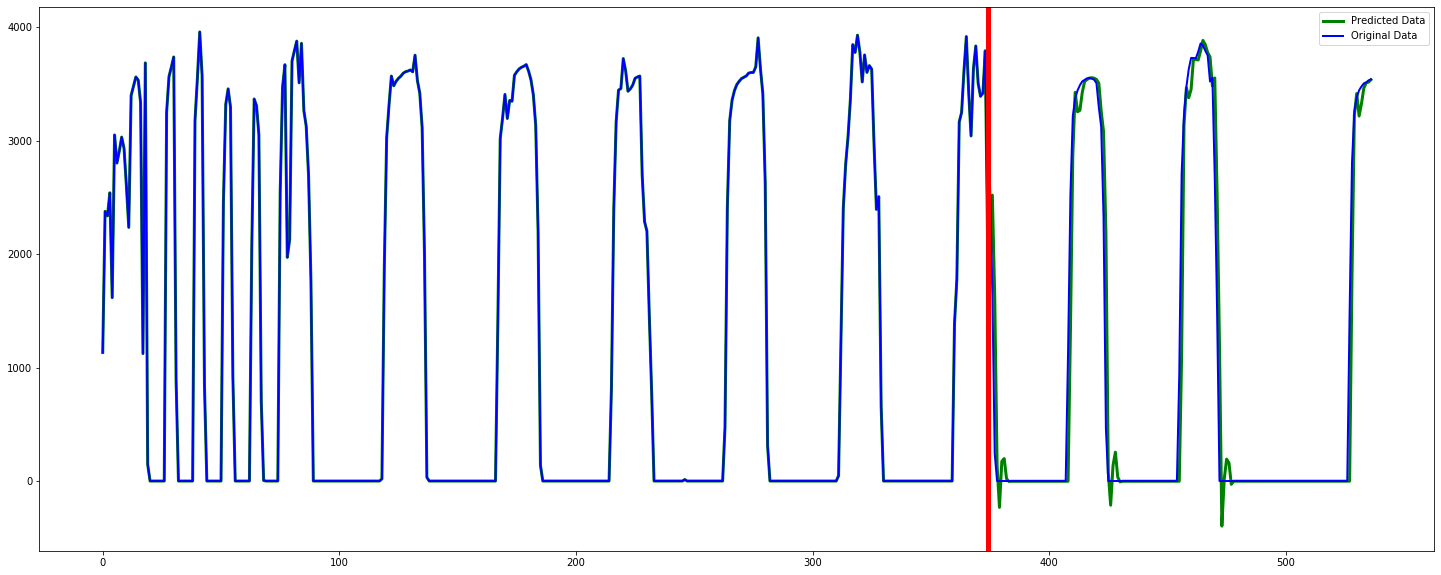

In [13]:
#ARIMA - Autoregressive Integrated Moving Average Model 
#A model that uses the dependency between an observation and a residual error 
#from a moving average model applied to lagged observations

from statsmodels.tsa.arima_model import ARIMA
def forcast_ts(data, tt_ratio):
    X = data.values
    size = int(len(X) * tt_ratio)
    train, test = X[0:size], X[size:len(X)]
    history = [x for x in train]
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=(5,1,0))
        model_fit = model.fit(disp=0)
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
        print('progress:%',round(100*(t/len(test))),'\t predicted=%f, expected=%f' % (yhat, obs), end="\r")
    error = mean_squared_error(test, predictions)
    print('\n Test MSE: %.3f' % error)

    plt.rcParams["figure.figsize"] = (25,10)
    preds = np.append(train, predictions)
    plt.plot(list(preds), color='green', linewidth=3, label="Predicted Data")
    plt.plot(list(data), color='blue', linewidth=2, label="Original Data")
    plt.axvline(x=int(len(data)*tt_ratio)-1, linewidth=5, color='red')
    plt.legend()
    plt.show()


tt_ratio = 0.70 # Train to Test ratio - this is used because a compromise between trade off between training it correctly and testing it effectively
forcast_ts(y, tt_ratio)


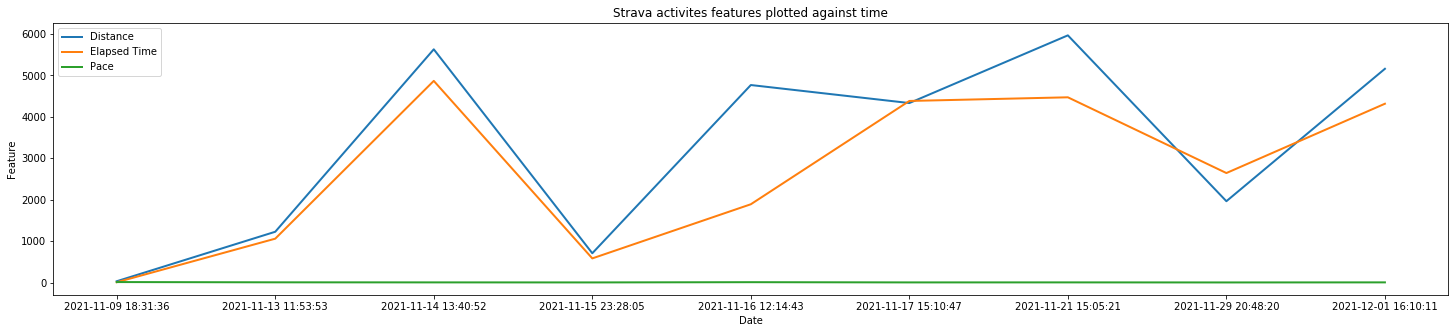

In [14]:
distance = strava_data["Distance"]
pace = strava_data["Pace"]
elapsed_time = strava_data["Elapsed time"]
strava_date = strava_data["Date"]


plt.figure(figsize=(25,5))
plt.plot(strava_date, distance, linewidth=2.0, label="Distance")
plt.plot(strava_date, elapsed_time, linewidth=2.0,label="Elapsed Time")
plt.plot(strava_date, pace, linewidth=2.0, label = "Pace")

plt.title("Strava activites features plotted against time")
plt.xlabel("Date")
plt.ylabel("Feature")

#plt.plot(list(distance), color='green', linewidth=3,)
#plt.plot(list(elapsed_time), color='blue', linewidth=3, label="Elapsed Time")
#plt.title("Plotting stava_data and elapsed_time against time")

plt.legend()
plt.show()




In [15]:
type(strava_data['Date'].iloc[0])
#need to change the data type from str to time compatible timestamp
strava_data["Date"][0]

'2021-11-09 18:31:36'

In [16]:
strava_dates = [datetime.datetime.strptime(t, '%Y-%m-%d %H:%M:%S') for t in strava_data["Date"]]
strava_data['New Date'] = strava_dates

type(strava_data['New Date'].iloc[0])

#strava puts in as a timestamp, but as it has been collected as a string inside the googlesheet, you need to change back into a timestamp to plot alongside the light intensity data

pandas._libs.tslibs.timestamps.Timestamp

[[0.60556182 0.3185722  0.24533722 0.20002307 0.47099253 0.22245128
  0.24533722 0.17896801 0.26089965]]
([0, 1, 2, 3, 4, 5, 6, 7], [[[0.6055618201914762, 0.3185722047265816, 0.245337215134264, 0.20002306532401748, 0.47099252681559256, 0.22245128088666474, 0.245337215134264, 0.17896800581622616, 0.26089965042263147]]])


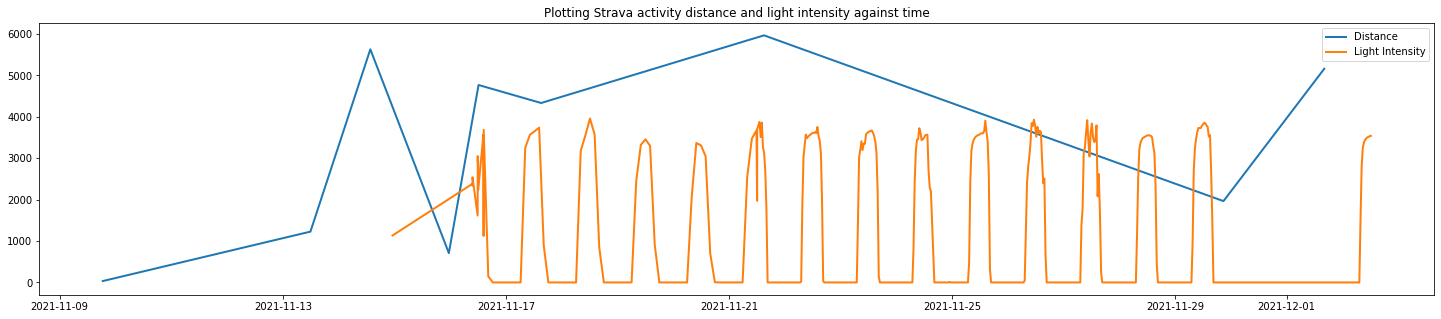

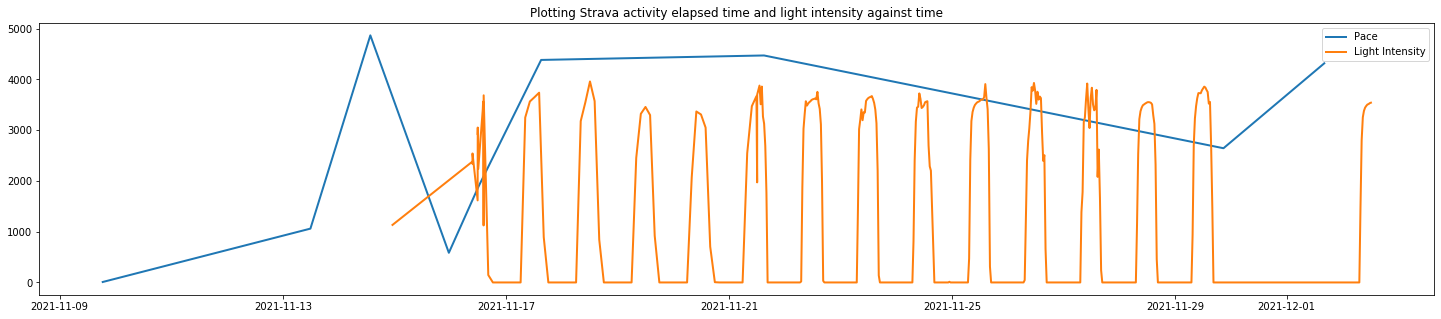

In [17]:
from sklearn import preprocessing
import numpy as np

normalized_pace = preprocessing.normalize([pace])
print(normalized_pace)
list = normalized_pace.tolist(); 
normalized_pacearr = [0,1,2,3,4,5,6,7],[list]
print(normalized_pacearr)

plt.figure(figsize=(25,5))
plt.plot(strava_dates, distance, linewidth=2.0, label="Distance")
plt.plot(x, y, linewidth=2.0, label="Light Intensity")
plt.title("Plotting Strava activity distance and light intensity against time")

plt.legend()
plt.show()

#might need to normalise this data

#plt.plot(strava_dates, normalized_pacearr, linewidth=2.0, label="Pace")
#plt.plot(x, y, linewidth=2.0, label="Light Intensity")
#plt.title("Plotting Strava activity pace and light intensity against time")

#plt.legend()
#plt.show()
plt.figure(figsize=(25,5))
plt.plot(strava_dates, elapsed_time, linewidth=2.0, label="Pace")
plt.plot(x, y, linewidth=2.0, label="Light Intensity")
plt.title("Plotting Strava activity elapsed time and light intensity against time")

plt.legend()
plt.show()

In [18]:
#normalise data, find a correlation and add in seasonality

#from statsmodels.tsa.seasonal import seasonal_decompose


#series = [x][y]
#result = seasonal_decompose(series, model='additive')
#print(result.trend)
#print(result.seasonal)
#print(result.resid)
#print(result.observed)



Pearson's Correlation between Light Intensity and Distance is: 0.076


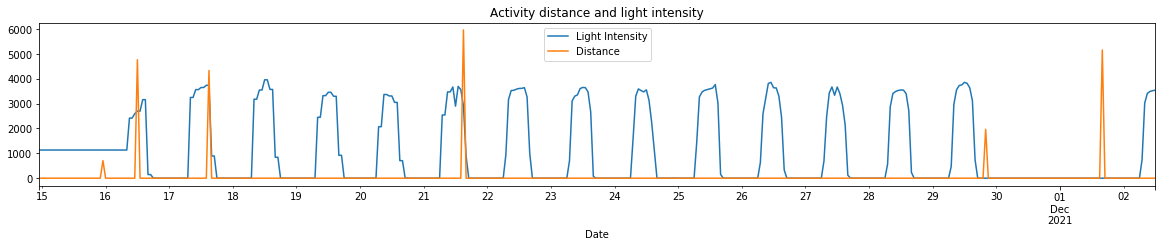

Pearson's Correlation between Light Intensity and Pace is:0.069


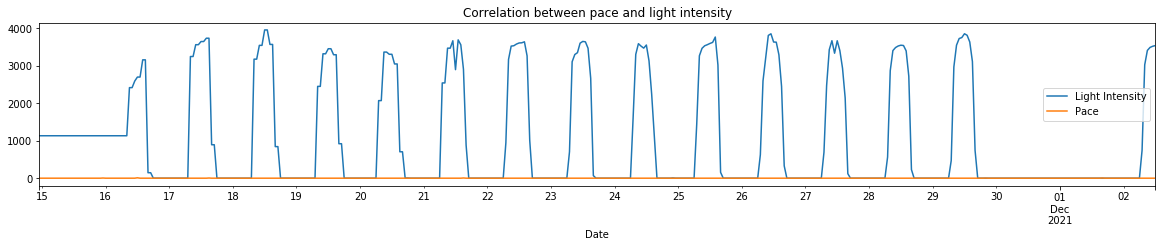

Pearson's Correlation between Light Intensity and Elapsed Time is: 0.066


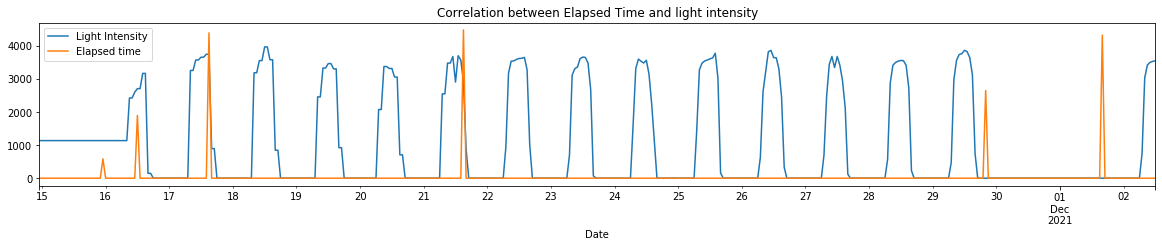

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20,3)

# prep strava data
strava_data2 = pd.read_csv("Strava_readings.csv")
strava_data2['Date'] = pd.to_datetime(strava_data2['Date'])
strava_data2 = strava_data2.resample('H', on='Date').sum()

# prep light data
light_intensity2 = pd.read_csv("Photosensor_readings.csv")
light_intensity2['Date'] = pd.to_datetime(light_intensity2['Date'])
light_intensity2 = light_intensity2.resample('H', on='Date').mean()
#print(light_intensity2)

dataframe = light_intensity2.copy() # copy the dataframe to merge the two
#dataframe.dropna() # this removes all hours without light intensity - use instead of the ffill() command below
dataframe['Kudos'] = strava_data2['Kudos']
dataframe['Distance'] = strava_data2['Distance']
dataframe['Pace'] = strava_data2['Pace']
dataframe['Elapsed time'] = strava_data2['Elapsed time']

# use this code to forward fill light intensities to times that don't have them, instead of the dropna() command above
dataframe['Light Intensity'] = dataframe['Light Intensity'].ffill()
dataframe = dataframe.fillna(0) # this replaces empty strava data with 0s

#print(dataframe)
dataframe.plot(y=['Light Intensity','Distance'])
plt.title("Activity distance and light intensity")
corr, _ = pearsonr(dataframe['Light Intensity'], dataframe['Distance'])
print("Pearson's Correlation between Light Intensity and Distance is: {:0.3f}".format(corr))

plt.show()

dataframe.plot(y=['Light Intensity','Pace'])
plt.title("Correlation between pace and light intensity")
corr, _ = pearsonr(dataframe['Light Intensity'], dataframe['Pace'])
print("Pearson's Correlation between Light Intensity and Pace is:{:0.3f}".format(corr))

plt.show()

#can't correlate data as it is a constant one or 0
#dataframe.plot(y=['Light Intensity','Kudos'])
#plt.title("Correlation between Kudos and light intensity")
#corr, _ = pearsonr(dataframe['Light Intensity'], dataframe['Kudos'])
#print(f"Pearson's Correlation between Light Intensity and Kudos is: {corr}")

#plt.show()

dataframe.plot(y=['Light Intensity','Elapsed time'])
plt.title("Correlation between Elapsed Time and light intensity")
corr, _ = pearsonr(dataframe['Light Intensity'], dataframe['Elapsed time'])
print("Pearson's Correlation between Light Intensity and Elapsed Time is: {:0.3f}".format(corr))

plt.show()



In [20]:
pip install jupyter-dash --user

Note: you may need to restart the kernel to use updated packages.


In [48]:
import plotly.express as px
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output, State
import pandas as pd

import plotly.io as pio

external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']


# Load Data
df = dataframe
#print(df)

tabs_styles = {'zIndex': 99, 'display': 'inlineBlock', 'height': '4vh', 'width': '12vw',
               'position': 'fixed', "background": "#323130", 'top': '12.5vh', 'left': '7.5vw',
               'border': 'grey', 'border-radius': '4px'}


# Build App
app = JupyterDash(__name__, external_stylesheets=external_stylesheets)


colors = {
    'background': '#FFFFFF',
    'text': '#0047ab'
}


fig1 = px.line(df, y=["Light Intensity", "Distance"])
fig2 = px.line(df, y=["Light Intensity", "Elapsed time"])


#fig.update_layout(
#    plot_bgcolor=colors['background'],
#    paper_bgcolor=colors['background'],
 #   font_color=colors['text']

#)


app.layout = html.Div(


    style={'backgroundColor': colors['background']}, children=[
    html.H1(
        children='Sensing & IOT - coursework 2',
        style={
            'textAlign': 'center',
            'color': colors['text'],
            'font-family': 'sans-serif'
        }  
    ),

    html.Div(children='Can we correlate light intensity with features of my Strava Actvities?', 
        style={
            'textAlign': 'center',
            'color': colors['text'],
            'font-family': 'sans-serif'
    }),
    
    dcc.Tabs([
        dcc.Tab(label='Light Intensity and Distance',   
                style={
            'textAlign': 'center',
            'color': colors['text'],
            'font-family': 'sans-serif'
        },
                children=[
            
            dcc.Graph(
                id = "Light intensity distance graph",
          
                figure=fig1
                     
            )
           
    
        ]),
    
     dcc.Tab(label='Light Intensity and Elapsed Time', 
             style={
            'textAlign': 'center',
            'color': colors['text'],
            'font-family': 'sans-serif'
        },
             children=[
            
        dcc.Graph(
            id = "Light intensity elapsed time graph",
            
            figure=fig2,
            
            
                     
            )
        ]),
        
       dcc.Tab(label='Data actuation', 
             style={
            'textAlign': 'center',
            'color': colors['text'],
            'font-family': 'sans-serif'
        },
             children=[
            
      html.Div([
        dcc.Input(id='input-1-state', type='text', value='How light is it outside?'),
        dcc.Input(id='input-2-state', type='text', value='How are you feeling?'),
        html.Button(id='submit-button-state', n_clicks=0, children='Submit'),
        html.Div(id='output-state')
        
])
        ]),
        
   
]) 
    
   
])
      
@app.callback(Output('output-state', 'children'),
              Input('submit-button-state', 'n_clicks'),
              State('input-1-state', 'value'),
              State('input-2-state', 'value'))
def update_output(n_clicks, input1, input2):
    if n_clicks ==1:
        return u'''
            It is "{}" outside,
            you feel "{}",
            And you have pressed this button {} times, which means you should probably go for a run
        
            '''.format(input1, input2,n_clicks)
       
        n_clicks = 0
   

# Run app and display result inline in the notebook
app.run_server(mode='external', debug=True) #to run locally use mode="inline" and to run externally use mode="external"

Dash app running on http://127.0.0.1:8050/
